In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#df1 = pd.read_csv('/content/random labeled.csv', sep=';', usecols=['cleantext', 'label'])
df1 = pd.read_csv('/content/drive/MyDrive/college/TTTTTTAAAAAAAA/dataset TA/labeled 5000.csv', sep=';', usecols=['cleantext', 'tokens', 'label'])

In [ ]:
import ast

def converter(df):
  token = ast.literal_eval(df)
  return [i for i in token]

df1['tokens'] = df1['tokens'].apply(converter)
df1.head()

,cleantext,tokens,label
0,gue mix feelings banget gue takut siang uas it...,"[gue, mix, feelings, banget, gue, takut, siang...",-1
1,ppl are losing their minds like wdym yall buyi...,"[ppl, are, losing, their, minds, like, wdym, y...",-1
2,kemarin bal jaman covid riweuhnya main perkara...,"[kemarin, bal, jaman, covid, riweuhnya, main, ...",-1
3,list pbl cari kos diskusi orang tua enak vaksi...,"[list, pbl, cari, kos, diskusi, orang, tua, en...",-1
4,bego banget landa bencana negeri pengin patahi...,"[bego, banget, landa, bencana, negeri, pengin,...",-1


In [ ]:
train1, test1 = train_test_split(df1, test_size=0.3, random_state=42)
train2, test2 = train_test_split(df1, test_size=0.2, random_state=42)
#train3, test3 = train_test_split(df1, test_size=0.1, random_state=42)

print(f"Training 1 samples: {train1.shape[0]}")
print(f"Testing 1 samples: {test1.shape[0]}")
print(f"Training 2 samples: {train2.shape[0]}")
print(f"Testing 2 samples: {test2.shape[0]}")
#print(f"Training 3 samples: {train3.shape[0]}")
#print(f"Testing 3 samples: {test3.shape[0]}")

In [ ]:
def features(x):
  all_tokens = x.tokens.explode()
  allwordlist = all_tokens.value_counts().reset_index()
  allwordlist.columns = ['Word', 'Frequency']
  return allwordlist

train_1 = features(train1)
train_2 = features(train2)
test_1 = features(test1)
test_2 = features(test2)

In [ ]:
print(train_1.shape)
print(train_2.shape)
print(test_1.shape)
print(test_2.shape)

In [ ]:
train_1.to_csv('1train_1.csv', sep=';', index=False)
train_2.to_csv('1train_2.csv', sep=';', index=False)
test_1.to_csv('1test_1.csv', sep=';', index=False)
test_2.to_csv('1test_2.csv', sep=';', index=False)

In [ ]:
def traintest(train,test):
  train_x = train['cleantext'].astype('U').values
  train_y = train['label']
  test_x = test['cleantext'].astype('U').values
  test_y = test['label']
  return train_x, train_y, test_x, test_y

train_x1, train_y1, test_x1, test_y1 = traintest(train1, test1) 
train_x2, train_y2, test_x2, test_y2 = traintest(train2, test2)
#train_x3, train_y3, test_x3, test_y3 = traintest(train3, test3)

In [ ]:
train_0, train_1 = len(train_y1[train_y1==-1]), len(train_y1[train_y1==1])
test_0, test_1 = len(test_y1[test_y1==-1]), len(test_y1[test_y1==1])
print('>Train: -1=%d, 1=%d, Test: -1=%d, 1=%d' % (train_0, train_1, test_0, test_1))
train_0, train_1 = len(train_y2[train_y2==-1]), len(train_y2[train_y2==1])
test_0, test_1 = len(test_y2[test_y2==-1]), len(test_y2[test_y2==1])
print('>Train: -1=%d, 1=%d, Test: -1=%d, 1=%d' % (train_0, train_1, test_0, test_1))
#train_0, train_1 = len(train_y3[train_y3==-1]), len(train_y3[train_y3==1])
#test_0, test_1 = len(test_y3[test_y3==-1]), len(test_y3[test_y3==1])
#print('>Train: -1=%d, 1=%d, Test: -1=%d, 1=%d' % (train_0, train_1, test_0, test_1))

In [ ]:
#print('NAIVE BAYES GAUSSIAN CLASSIFICATION ACCURACY RESULTS\n\n')
def nbg_classifier(train_x,train_y,test_x,test_y,mf,min,max,norm,mdf,ui,vs):
  tfidf_vect = TfidfVectorizer(max_features=mf, ngram_range=(min,max), norm=norm, max_df=mdf, use_idf=ui)
  nb_gaussian_classifier = GaussianNB(var_smoothing=vs)
  
  x_train_tfidf = tfidf_vect.fit_transform(train_x)
  x_test_tfidf = tfidf_vect.transform(test_x)

  start_time = time.time()
  
  x_train_tfidf = x_train_tfidf.toarray()
  x_test_tfidf = x_test_tfidf.toarray()
  
  nbg = nb_gaussian_classifier.fit(x_train_tfidf, train_y)

  y_pred = nbg.predict(x_test_tfidf)
  ytrain_pred = nbg.predict(x_train_tfidf)
  y_pred_pr = nbg.predict_proba(x_test_tfidf)

  score1 = metrics.accuracy_score(test_y, y_pred)
  score2 = metrics.accuracy_score(train_y, ytrain_pred)
  
  cvscore = cross_val_score(nbg, x_test_tfidf, test_y, cv=10, n_jobs=1)
  cvscore2 = cross_val_score(nbg, x_train_tfidf, train_y, cv=10, n_jobs=1)
  cvpred_pr = cross_val_predict(nbg, x_test_tfidf, test_y, cv=10, n_jobs=1, method='predict_proba')
  
  #print('Test accuracy: %.3f\nTrain accuracy: %.3f' %(score1, score2))
  #print('10 Folds: \n%s' %cvscore)
  print('10CV Mean accuracy: %.3f +/- %.3f' %(np.mean(cvscore), np.std(cvscore)))
  print("\nNormal accuracy:   %0.3f" % score1)

  print(metrics.classification_report(test_y, y_pred))

  print("Confusion matrix:")
  print(metrics.confusion_matrix(test_y, y_pred))
  print("Duration: %s seconds" % (time.time() - start_time))
  print('\n------------------------------\n')
  accuracy = round(np.mean(cvscore), 5)
  accuracy2 = round(np.mean(cvscore2), 5)
  #list_y_pred.append(y_pred)
  #list_accuracy.append(accuracy)
  #list_accuracy2.append(accuracy2)
  #list_cvscore.append(cvscore)
  #list_cvscore2.append(cvscore2)
  #list_y_pred_pr.append(y_pred_pr)
  #list_cvpred_pr.append(cvpred_pr)
  return y_pred, y_pred_pr, accuracy, cvscore, cvpred_pr

 
#a1,b1,c1,d1,e1 = nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, 2e-9)
#a2,b2,c2,d2,e2 = nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, 2e-9)
#a3,b3,c3,d3,e3 = nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, 2e-9)

#a4,b4,c4,d4,e4 = nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, 2e-9)
#a5,b5,c5,d5,e5 = nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, 2e-9)
#a6,b6,c6,d6,e6 = nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 2e-9)

In [ ]:
from matplotlib import markers
def nbg_roc_auc(df_uni, df_unibi, df_bi, test_y, df_uni2, df_unibi2, df_bi2, test_y2, split):
  fpr_uni, tpr_uni, trh_uni = roc_curve(test_y, df_uni[:,1])
  auc_uni = auc(fpr_uni,tpr_uni)
  fpr_bi, tpr_bi, trh_bi = roc_curve(test_y, df_bi[:,1])
  auc_bi = auc(fpr_bi,tpr_bi)
  fpr_unibi, tpr_unibi, trh_unibi = roc_curve(test_y, df_unibi[:,1])
  auc_unibi = auc(fpr_unibi,tpr_unibi)

  fpr_uni2, tpr_uni2, trh_uni2 = roc_curve(test_y2, df_uni2[:,1])
  auc_uni2 = auc(fpr_uni2,tpr_uni2)
  fpr_bi2, tpr_bi2, trh_bi2 = roc_curve(test_y2, df_bi2[:,1])
  auc_bi2 = auc(fpr_bi2,tpr_bi2)
  fpr_unibi2, tpr_unibi2, trh_unibi2 = roc_curve(test_y2, df_unibi2[:,1])
  auc_unibi2 = auc(fpr_unibi2,tpr_unibi2)  
  
  plt.figure(figsize=(10,10), dpi=300)
  plt.title('ROC AUC %s' % split)
  
  plt.plot(fpr_uni, tpr_uni, color='blue', label='unigram split 7:3 (AUC = %0.3f)' % auc_uni)
  plt.plot(fpr_bi, tpr_bi, color='red', label='bigram split 7:3 (AUC = %0.3f)' % auc_bi)
  plt.plot(fpr_unibi, tpr_unibi, color='green', label='1-2gram split 7:3 (AUC = %0.3f)' % auc_unibi)

  plt.plot(fpr_uni2, tpr_uni2, color='skyblue', ls='--' , label='unigram split 8:2 (AUC = %0.3f)' % auc_uni2)
  plt.plot(fpr_bi2, tpr_bi2, color='salmon', ls='--' , label='bigram split 8:2 (AUC = %0.3f)' % auc_bi2)
  plt.plot(fpr_unibi2, tpr_unibi2, color='lightgreen', ls='--' , label='1-2gram split 8:2 (AUC = %0.3f)' % auc_unibi2)
  
  plt.legend(loc='lower right')
  plt.show()

#nbg_roc_auc(e1, e2, e3, test_y1, e4, e5, e6, test_y2, "GaussianNB")

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, 2e-9)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbg 1 data1.csv', sep=';', index=False)
files.download("nbg 1 data1.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, 2e-9)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbg 12 data1.csv', sep=';', index=False)
files.download("nbg 12 data1.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, 2e-9)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbg 2 data1.csv', sep=';', index=False)
files.download("nbg 2 data1.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, 2e-9)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbg 1 data2.csv', sep=';', index=False)
files.download("nbg 1 data2.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, 2e-9)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbg 12 data2.csv', sep=';', index=False)
files.download("nbg 12 data2.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, 1e-9)
print('1/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, 1e-9)
print('2/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, 1e-9)
print('3/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, 1e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, 1e-9)

print('4/8')

nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, 2e-9)
print('5/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, 2e-9)
print('6/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, 2e-9)
print('7/8')
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, 2e-9)
nbg_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, 2e-9)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbg 2 data2.csv', sep=';', index=False)
files.download("nbg 2 data2.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#print('NAIVE BAYES MULTINOMIAL CLASSIFICATION ACCURACY RESULTS\n\n')
def nbm_classifier(train_x,train_y,test_x,test_y,mf,min,max,norm,mdf,ui,fp):
  tfidf_vect = TfidfVectorizer(max_features=mf, ngram_range=(min,max), norm=norm, max_df=mdf, use_idf=ui)
  nb_multinomial_classifier = MultinomialNB(fit_prior=fp)
  
  x_train_tfidf = tfidf_vect.fit_transform(train_x)
  x_test_tfidf = tfidf_vect.transform(test_x)
  
  start_time = time.time()
  
  nbm = nb_multinomial_classifier.fit(x_train_tfidf, train_y)

  y_pred = nbm.predict(x_test_tfidf)
  ytrain_pred = nbm.predict(x_train_tfidf)
  y_pred_pr = nbm.predict_proba(x_test_tfidf)

  score1 = metrics.accuracy_score(test_y, y_pred)
  score2 = metrics.accuracy_score(train_y, ytrain_pred)
  
  cvscore = cross_val_score(nbm, x_test_tfidf, test_y, cv=10, n_jobs=1)
  cvscore2 = cross_val_score(nbm, x_train_tfidf, train_y, cv=10, n_jobs=1)
  cvpred_pr = cross_val_predict(nbm, x_test_tfidf, test_y, cv=10, n_jobs=1, method='predict_proba')
  
  #print('Test accuracy: %.3f\nTrain accuracy: %.3f' %(score1, score2))
  #print('10 Folds: \n%s' %cvscore)
  print('10CV Mean accuracy: %.3f +/- %.3f' %(np.mean(cvscore), np.std(cvscore)))
  print("\nNormal accuracy:   %0.3f" % score1)

  print(metrics.classification_report(test_y, y_pred))

  print("Confusion matrix:")
  print(metrics.confusion_matrix(test_y, y_pred))
  print("Duration: %s seconds" % (time.time() - start_time))
  print('\n------------------------------\n')
  accuracy = round(np.mean(cvscore), 5)
  accuracy2 = round(np.mean(cvscore2), 5)
  #list_y_pred.append(y_pred)
  #list_y_pred_pr.append(y_pred_pr)
  #list_accuracy.append(accuracy)
  #list_accuracy2.append(accuracy2)
  #list_cvscore.append(cvscore)
  #list_cvscore2.append(cvscore2)
  #list_cvpred_pr.append(cvpred_pr)
  return y_pred, y_pred_pr, accuracy, cvscore, cvpred_pr

#f1,g1,h1,i1,j1 = nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, True)
#f2,g2,h2,i2,j2 = nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, False)
#f3,g3,h3,i3,j3 = nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, True)

#f4,g4,h4,i4,j4 = nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, False)
#f5,g5,h5,i5,j5 = nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, False)
#f6,g6,h6,i6,j6 = nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, False)

10CV Mean accuracy: 0.768 +/- 0.025

Normal accuracy:   0.767
              precision    recall  f1-score   support

          -1       0.83      0.69      0.75       768
           1       0.72      0.85      0.78       732

    accuracy                           0.77      1500
   macro avg       0.78      0.77      0.77      1500
weighted avg       0.78      0.77      0.77      1500

Confusion matrix:
[[527 241]
 [108 624]]
Duration: 0.10598158836364746 seconds

------------------------------

10CV Mean accuracy: 0.761 +/- 0.037

Normal accuracy:   0.767
              precision    recall  f1-score   support

          -1       0.82      0.70      0.75       768
           1       0.73      0.84      0.78       732

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500

Confusion matrix:
[[536 232]
 [117 615]]
Duration: 0.2776927947998047 seconds

------------------------------


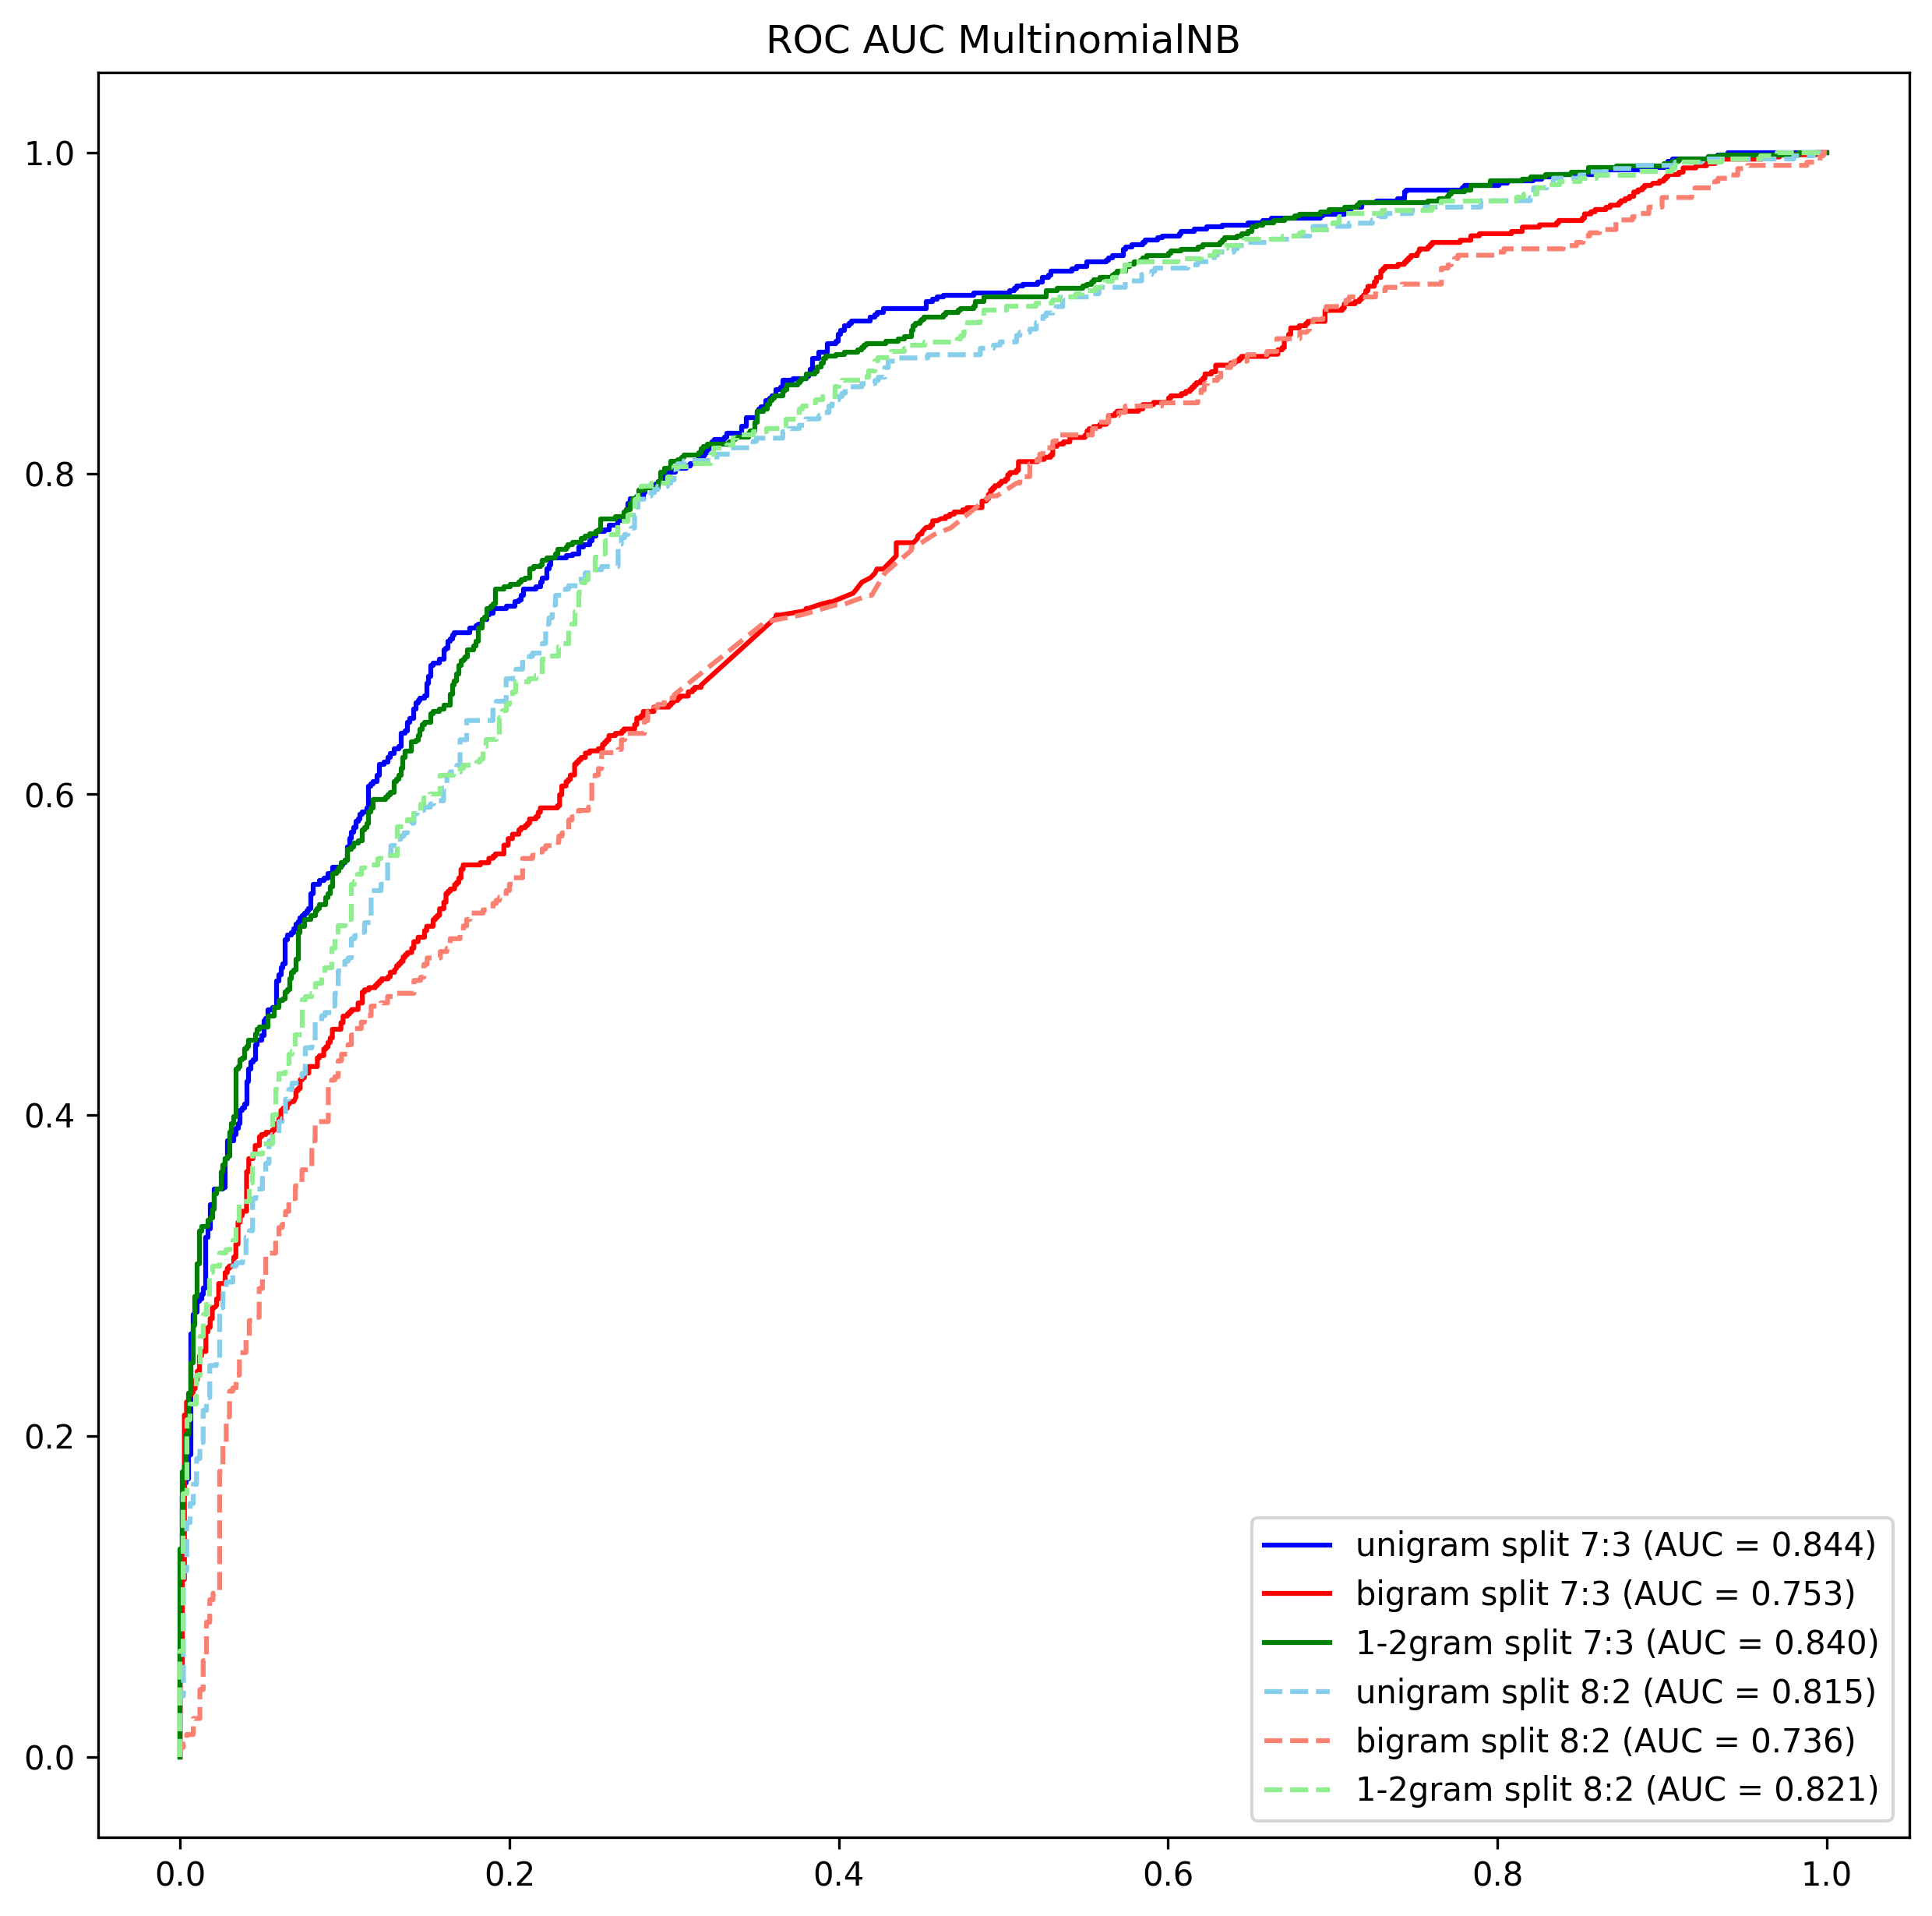

In [ ]:
def nbm_roc_auc(df_uni, df_unibi, df_bi, test_y, df_uni2, df_unibi2, df_bi2, test_y2, split):
  fpr_uni, tpr_uni, trh_uni = roc_curve(test_y, df_uni[:,1])
  auc_uni = auc(fpr_uni,tpr_uni)
  fpr_bi, tpr_bi, trh_bi = roc_curve(test_y, df_bi[:,1])
  auc_bi = auc(fpr_bi,tpr_bi)
  fpr_unibi, tpr_unibi, trh_unibi = roc_curve(test_y, df_unibi[:,1])
  auc_unibi = auc(fpr_unibi,tpr_unibi)

  fpr_uni2, tpr_uni2, trh_uni2 = roc_curve(test_y2, df_uni2[:,1])
  auc_uni2 = auc(fpr_uni2,tpr_uni2)
  fpr_bi2, tpr_bi2, trh_bi2 = roc_curve(test_y2, df_bi2[:,1])
  auc_bi2 = auc(fpr_bi2,tpr_bi2)
  fpr_unibi2, tpr_unibi2, trh_unibi2 = roc_curve(test_y2, df_unibi2[:,1])
  auc_unibi2 = auc(fpr_unibi2,tpr_unibi2)  
  
  plt.figure(figsize=(10,10), dpi=300)
  plt.title('ROC AUC %s' % split)
  
  plt.plot(fpr_uni, tpr_uni, color='blue', label='unigram split 7:3 (AUC = %0.3f)' % auc_uni)
  plt.plot(fpr_bi, tpr_bi, color='red', label='bigram split 7:3 (AUC = %0.3f)' % auc_bi)
  plt.plot(fpr_unibi, tpr_unibi, color='green', label='1-2gram split 7:3 (AUC = %0.3f)' % auc_unibi)

  plt.plot(fpr_uni2, tpr_uni2, color='skyblue', ls='--' , label='unigram split 8:2 (AUC = %0.3f)' % auc_uni2)
  plt.plot(fpr_bi2, tpr_bi2, color='salmon', ls='--' , label='bigram split 8:2 (AUC = %0.3f)' % auc_bi2)
  plt.plot(fpr_unibi2, tpr_unibi2, color='lightgreen', ls='--' , label='1-2gram split 8:2 (AUC = %0.3f)' % auc_unibi2)
  
  plt.legend(loc='lower right')
  plt.show()

#nbm_roc_auc(j1, j2, j3, test_y1, j4, j5, j6, test_y2, 'MultinomialNB')

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, False)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbm 1 data1.csv', sep=';', index=False)
files.download("nbm 1 data1.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, False)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbm 12 data1.csv', sep=';', index=False)
files.download("nbm 12 data1.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, False)

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('nbm 2 data1.csv', sep=';', index=False)
files.download("nbm 2 data1.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, False)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbm 1 data2.csv', sep=';', index=False)
files.download("nbm 1 data2.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, False)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbm 12 data2.csv', sep=';', index=False)
files.download("nbm 12 data2.csv")


list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, True)
print('1/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, True)
print('2/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, True)
print('3/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, True)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, True)

print('4/8')

nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, False)
print('5/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, False)
print('6/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, False)
print('7/8')
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, False)
nbm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, False)

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('nbm 2 data2.csv', sep=';', index=False)
files.download("nbm 2 data2.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#print('SVM CLASSIFICATION ACCURACY RESULTS\n\n')
def svm_classifier(train_x,train_y,test_x,test_y,mf,min,max,norm,mdf,ui,g):
  tfidf_vect = TfidfVectorizer(max_features=mf, ngram_range=(min,max), norm=norm, max_df=mdf, use_idf=ui)
  svm_classifier = SVC(gamma=g)
  
  x_train_tfidf = tfidf_vect.fit_transform(train_x)
  x_test_tfidf = tfidf_vect.transform(test_x)
  
  start_time = time.time()
  
  svm = svm_classifier.fit(x_train_tfidf, train_y)

  y_pred = svm.predict(x_test_tfidf)
  ytrain_pred = svm.predict(x_train_tfidf)
  y_pred_pr = svm.decision_function(x_test_tfidf)

  score1 = metrics.accuracy_score(test_y, y_pred)
  score2 = metrics.accuracy_score(train_y, ytrain_pred)
  
  cvscore = cross_val_score(svm, x_test_tfidf, test_y, cv=10, n_jobs=1)
  cvscore2 = cross_val_score(svm, x_train_tfidf, train_y, cv=10, n_jobs=1)
  cvpred_pr = cross_val_predict(svm, x_test_tfidf, test_y, cv=10, n_jobs=1, method='decision_function')
  
  #print('Test accuracy: %.3f\nTrain accuracy: %.3f' %(score1, score2))
  #print('10 Folds: \n%s' %cvscore)
  print('10CV Mean accuracy: %.3f +/- %.3f' %(np.mean(cvscore), np.std(cvscore)))
  print("\nNormal accuracy:   %0.3f" % score1)

  print(metrics.classification_report(test_y, y_pred))

  print("Confusion matrix:")
  print(metrics.confusion_matrix(test_y, y_pred))
  print("Duration: %s seconds" % (time.time() - start_time))
  print('\n------------------------------\n')
  accuracy = round(np.mean(cvscore), 5)
  accuracy2 = round(np.mean(cvscore2), 5)
  #list_y_pred.append(y_pred)
  #list_y_pred_pr.append(y_pred_pr)
  #list_accuracy.append(accuracy)
  #list_accuracy2.append(accuracy2)
  #list_cvscore.append(cvscore)
  #list_cvscore2.append(cvscore2)
  #list_cvpred_pr.append(cvpred_pr)
  return y_pred, y_pred_pr, accuracy, cvscore, cvpred_pr

#k1,l1,m1,n1,o1 = svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, 'scale')
#k2,l2,m2,n2,o2 = svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, 'scale')
#k3,l3,m3,n3,o3 = svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, 'scale')

#k4,l4,m4,n4,o4 = svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, 'scale')
#k5,l5,m5,n5,o5 = svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, 'scale')
#k6,l6,m6,n6,o6 = svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 'scale')

10CV Mean accuracy: 0.767 +/- 0.015

Normal accuracy:   0.805
              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       768
           1       0.79      0.81      0.80       732

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Confusion matrix:
[[615 153]
 [139 593]]
Duration: 17.07235884666443 seconds

------------------------------

10CV Mean accuracy: 0.768 +/- 0.024

Normal accuracy:   0.809
              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       768
           1       0.80      0.82      0.81       732

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Confusion matrix:
[[614 154]
 [132 600]]
Duration: 24.972755670547485 seconds

------------------------------

1

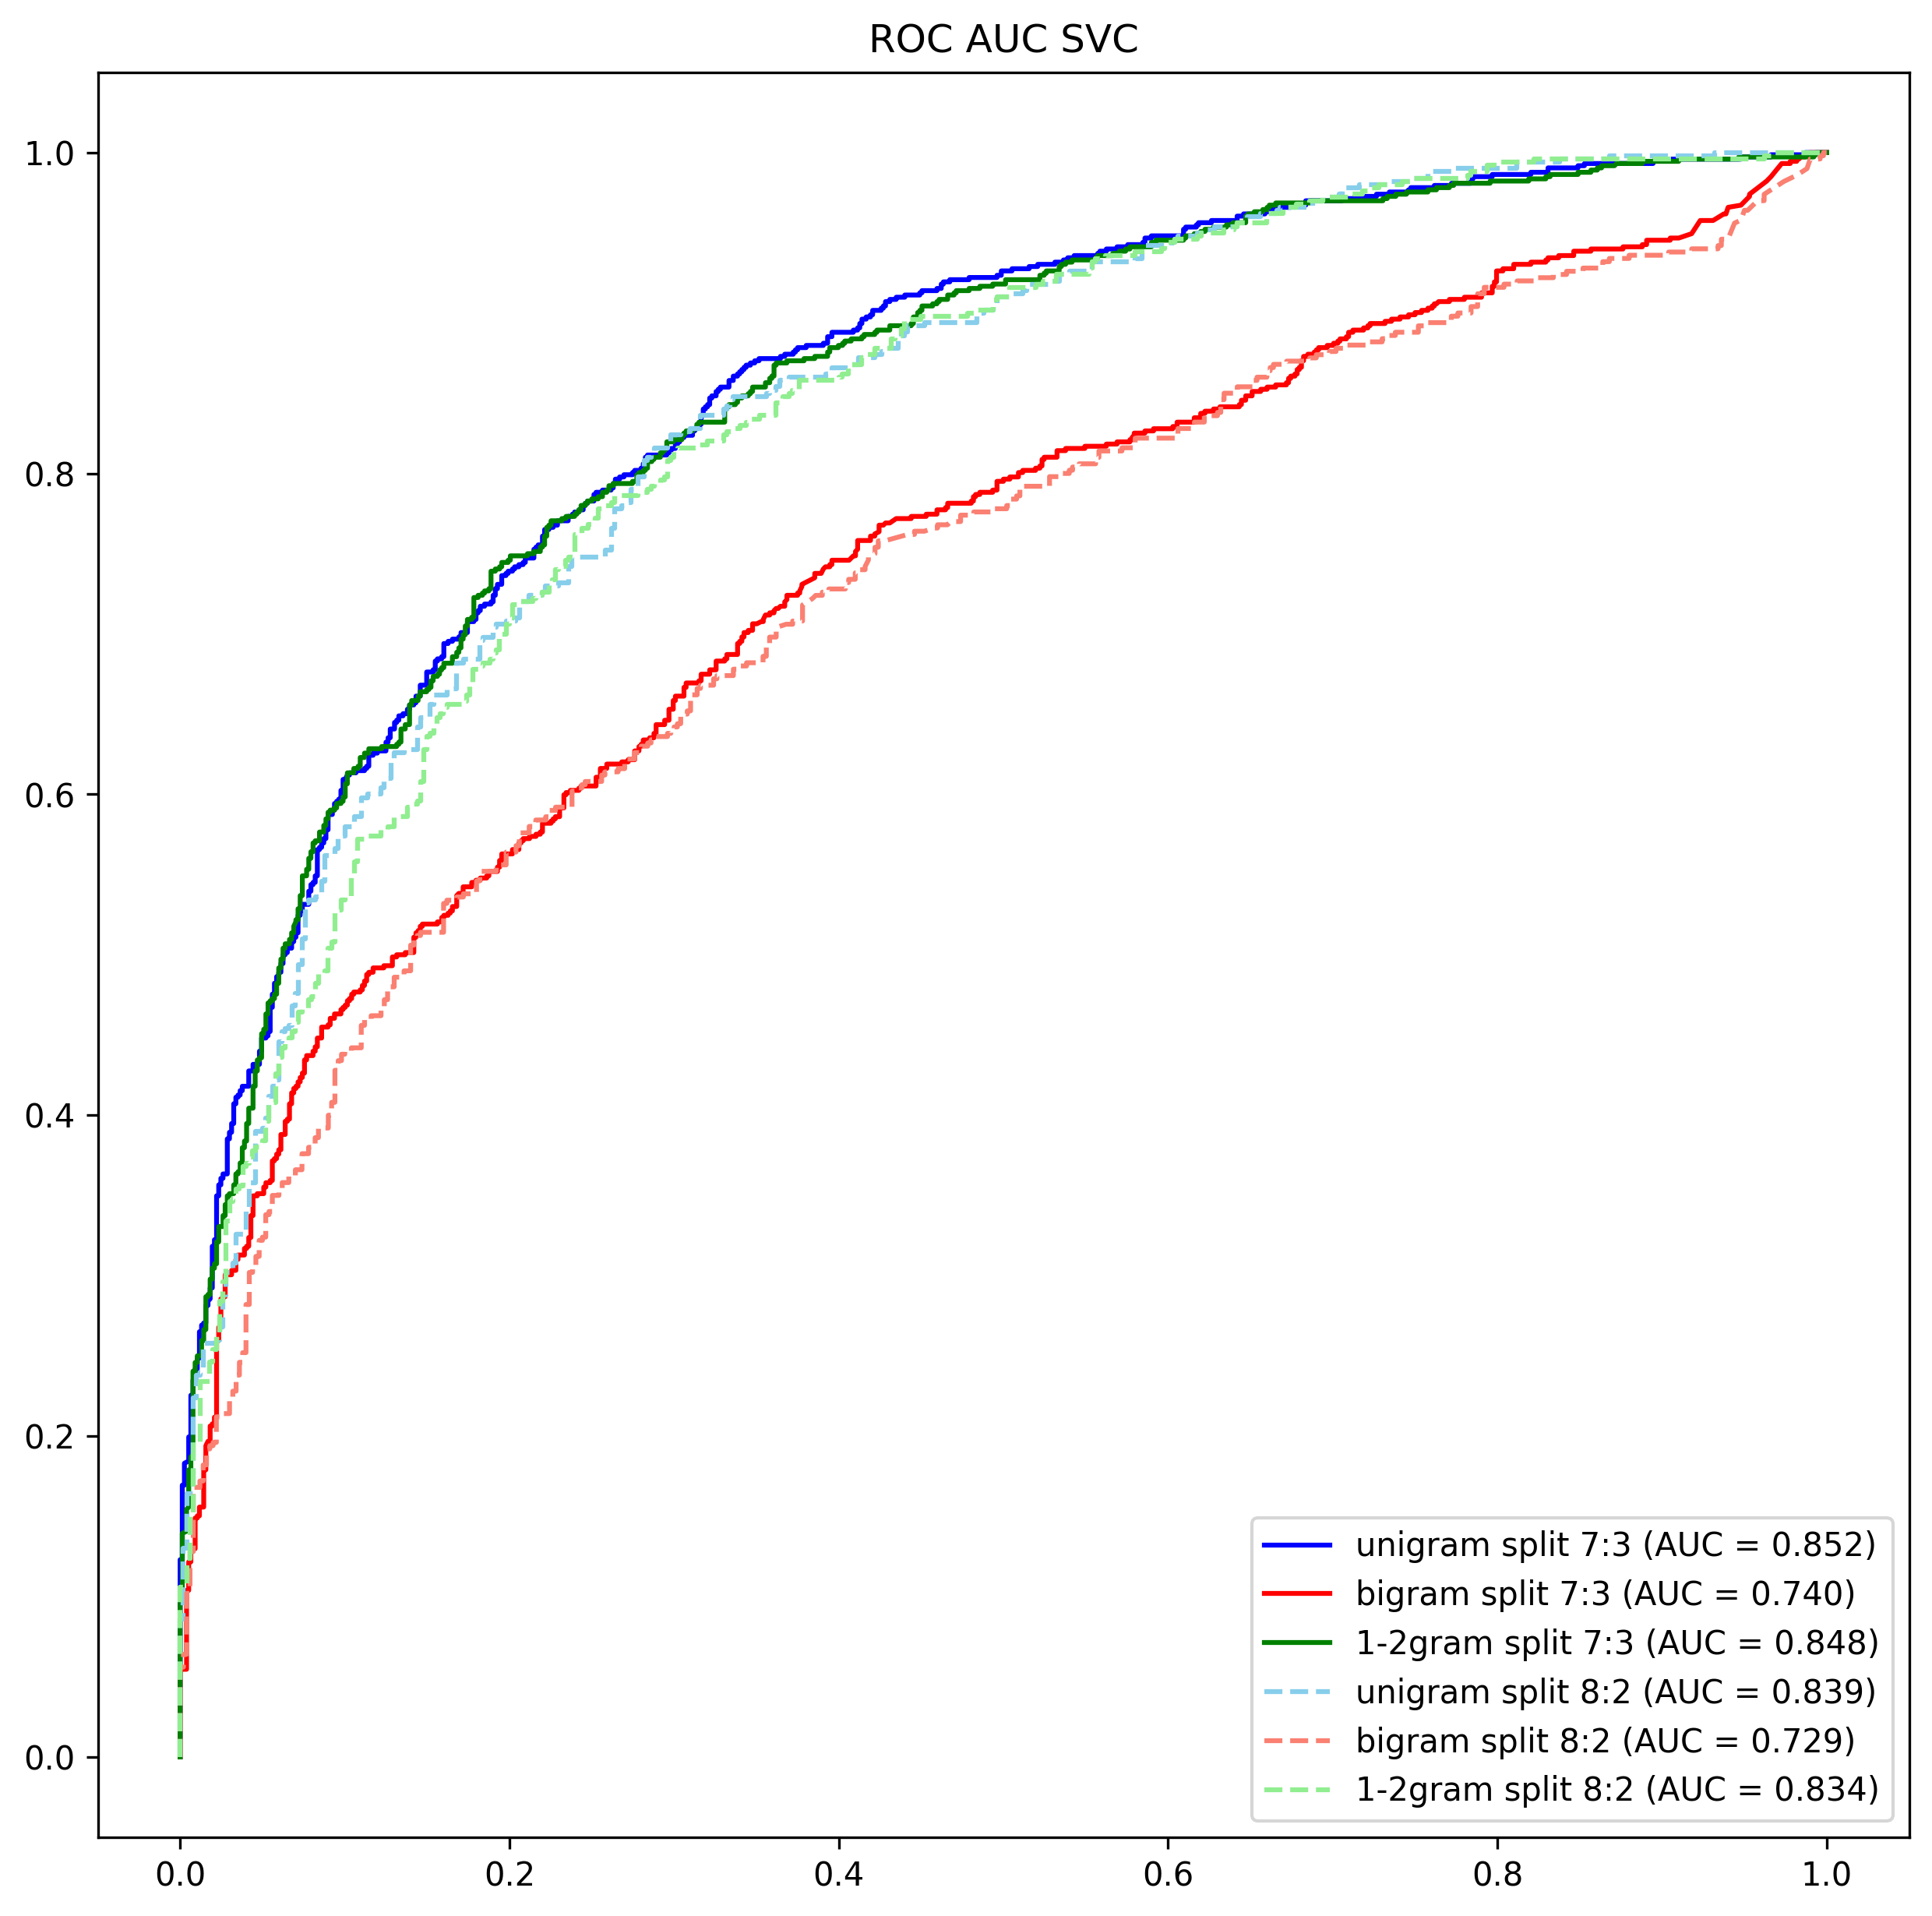

In [ ]:
def svm_roc_auc(df_uni, df_unibi, df_bi, test_y, df_uni2, df_unibi2, df_bi2, test_y2, split):
  fpr_uni, tpr_uni, trh_uni = roc_curve(test_y, df_uni)
  auc_uni = auc(fpr_uni,tpr_uni)
  fpr_bi, tpr_bi, trh_bi = roc_curve(test_y, df_bi)
  auc_bi = auc(fpr_bi,tpr_bi)
  fpr_unibi, tpr_unibi, trh_unibi = roc_curve(test_y, df_unibi)
  auc_unibi = auc(fpr_unibi,tpr_unibi)

  fpr_uni2, tpr_uni2, trh_uni2 = roc_curve(test_y2, df_uni2)
  auc_uni2 = auc(fpr_uni2,tpr_uni2)
  fpr_bi2, tpr_bi2, trh_bi2 = roc_curve(test_y2, df_bi2)
  auc_bi2 = auc(fpr_bi2,tpr_bi2)
  fpr_unibi2, tpr_unibi2, trh_unibi2 = roc_curve(test_y2, df_unibi2)
  auc_unibi2 = auc(fpr_unibi2,tpr_unibi2)  
  
  plt.figure(figsize=(10,10), dpi=300)
  plt.title('ROC AUC %s' % split)
  
  plt.plot(fpr_uni, tpr_uni, color='blue', label='unigram split 7:3 (AUC = %0.3f)' % auc_uni)
  plt.plot(fpr_bi, tpr_bi, color='red', label='bigram split 7:3 (AUC = %0.3f)' % auc_bi)
  plt.plot(fpr_unibi, tpr_unibi, color='green', label='1-2gram split 7:3 (AUC = %0.3f)' % auc_unibi)

  plt.plot(fpr_uni2, tpr_uni2, color='skyblue', ls='--' , label='unigram split 8:2 (AUC = %0.3f)' % auc_uni2)
  plt.plot(fpr_bi2, tpr_bi2, color='salmon', ls='--' , label='bigram split 8:2 (AUC = %0.3f)' % auc_bi2)
  plt.plot(fpr_unibi2, tpr_unibi2, color='lightgreen', ls='--' , label='1-2gram split 8:2 (AUC = %0.3f)' % auc_unibi2)
  
  plt.legend()
  plt.show()

#svm_roc_auc(o1, o2, o3, test_y1, o4, o5, o6, test_y2, 'SVC')

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3023, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1201, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 652, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 125, 1,1, 'l2', 0.5, False, 'auto')

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('svm 1 data1.csv', sep=';', index=False)
files.download("svm 1 data1.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 6776, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 1895, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 918, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 155, 1,2, 'l2', 0.5, False, 'auto')

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('svm 12 data1.csv', sep=';', index=False)
files.download("svm 12 data1.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, None, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 3754, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 694, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 266, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x1, train_y1, test_x1, test_y1, 30, 2,2, 'l2', 0.5, False, 'auto')

from google.colab import files
data1=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data1.to_csv('svm 2 data1.csv', sep=';', index=False)
files.download("svm 2 data1.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 3292, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1323, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 718, 1,1, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 143, 1,1, 'l2', 0.5, False, 'auto')

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('svm 1 data2.csv', sep=';', index=False)
files.download("svm 1 data2.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 7667, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 2131, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 1022, 1,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 177, 1,2, 'l2', 0.5, False, 'auto')

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('svm 12 data2.csv', sep=';', index=False)
files.download("svm 12 data2.csv")

list_y_pred=[]
list_y_pred_pr=[]
list_accuracy=[]
list_accuracy2=[]
list_cvscore=[]
list_cvscore2=[]
list_cvpred_pr=[]

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, 'scale')
print('1/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, 'scale')
print('2/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, 'scale')
print('3/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, 'scale')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, 'scale')

print('4/8')

svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, True, 'auto')
print('5/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l1', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l1', 0.5, False, 'auto')
print('6/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, True, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, True, 'auto')
print('7/8')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, None, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 4375, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 808, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 304, 2,2, 'l2', 0.5, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.75, False, 'auto')
svm_classifier(train_x2, train_y2, test_x2, test_y2, 34, 2,2, 'l2', 0.5, False, 'auto')

from google.colab import files
data2=pd.DataFrame(list(zip(list_accuracy, list_accuracy2, list_cvscore, list_cvscore2, list_y_pred, list_y_pred_pr, list_cvpred_pr)) , columns=['accuracy', 'accuracy2', 'cvscore', 'cvscore2', 'y_pred', 'y_pred_pr', 'cvpred_pr'])
data2.to_csv('svm 2 data2.csv', sep=';', index=False)
files.download("svm 2 data2.csv")

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/8
2/8
3/8
4/8
5/8
6/8
7/8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

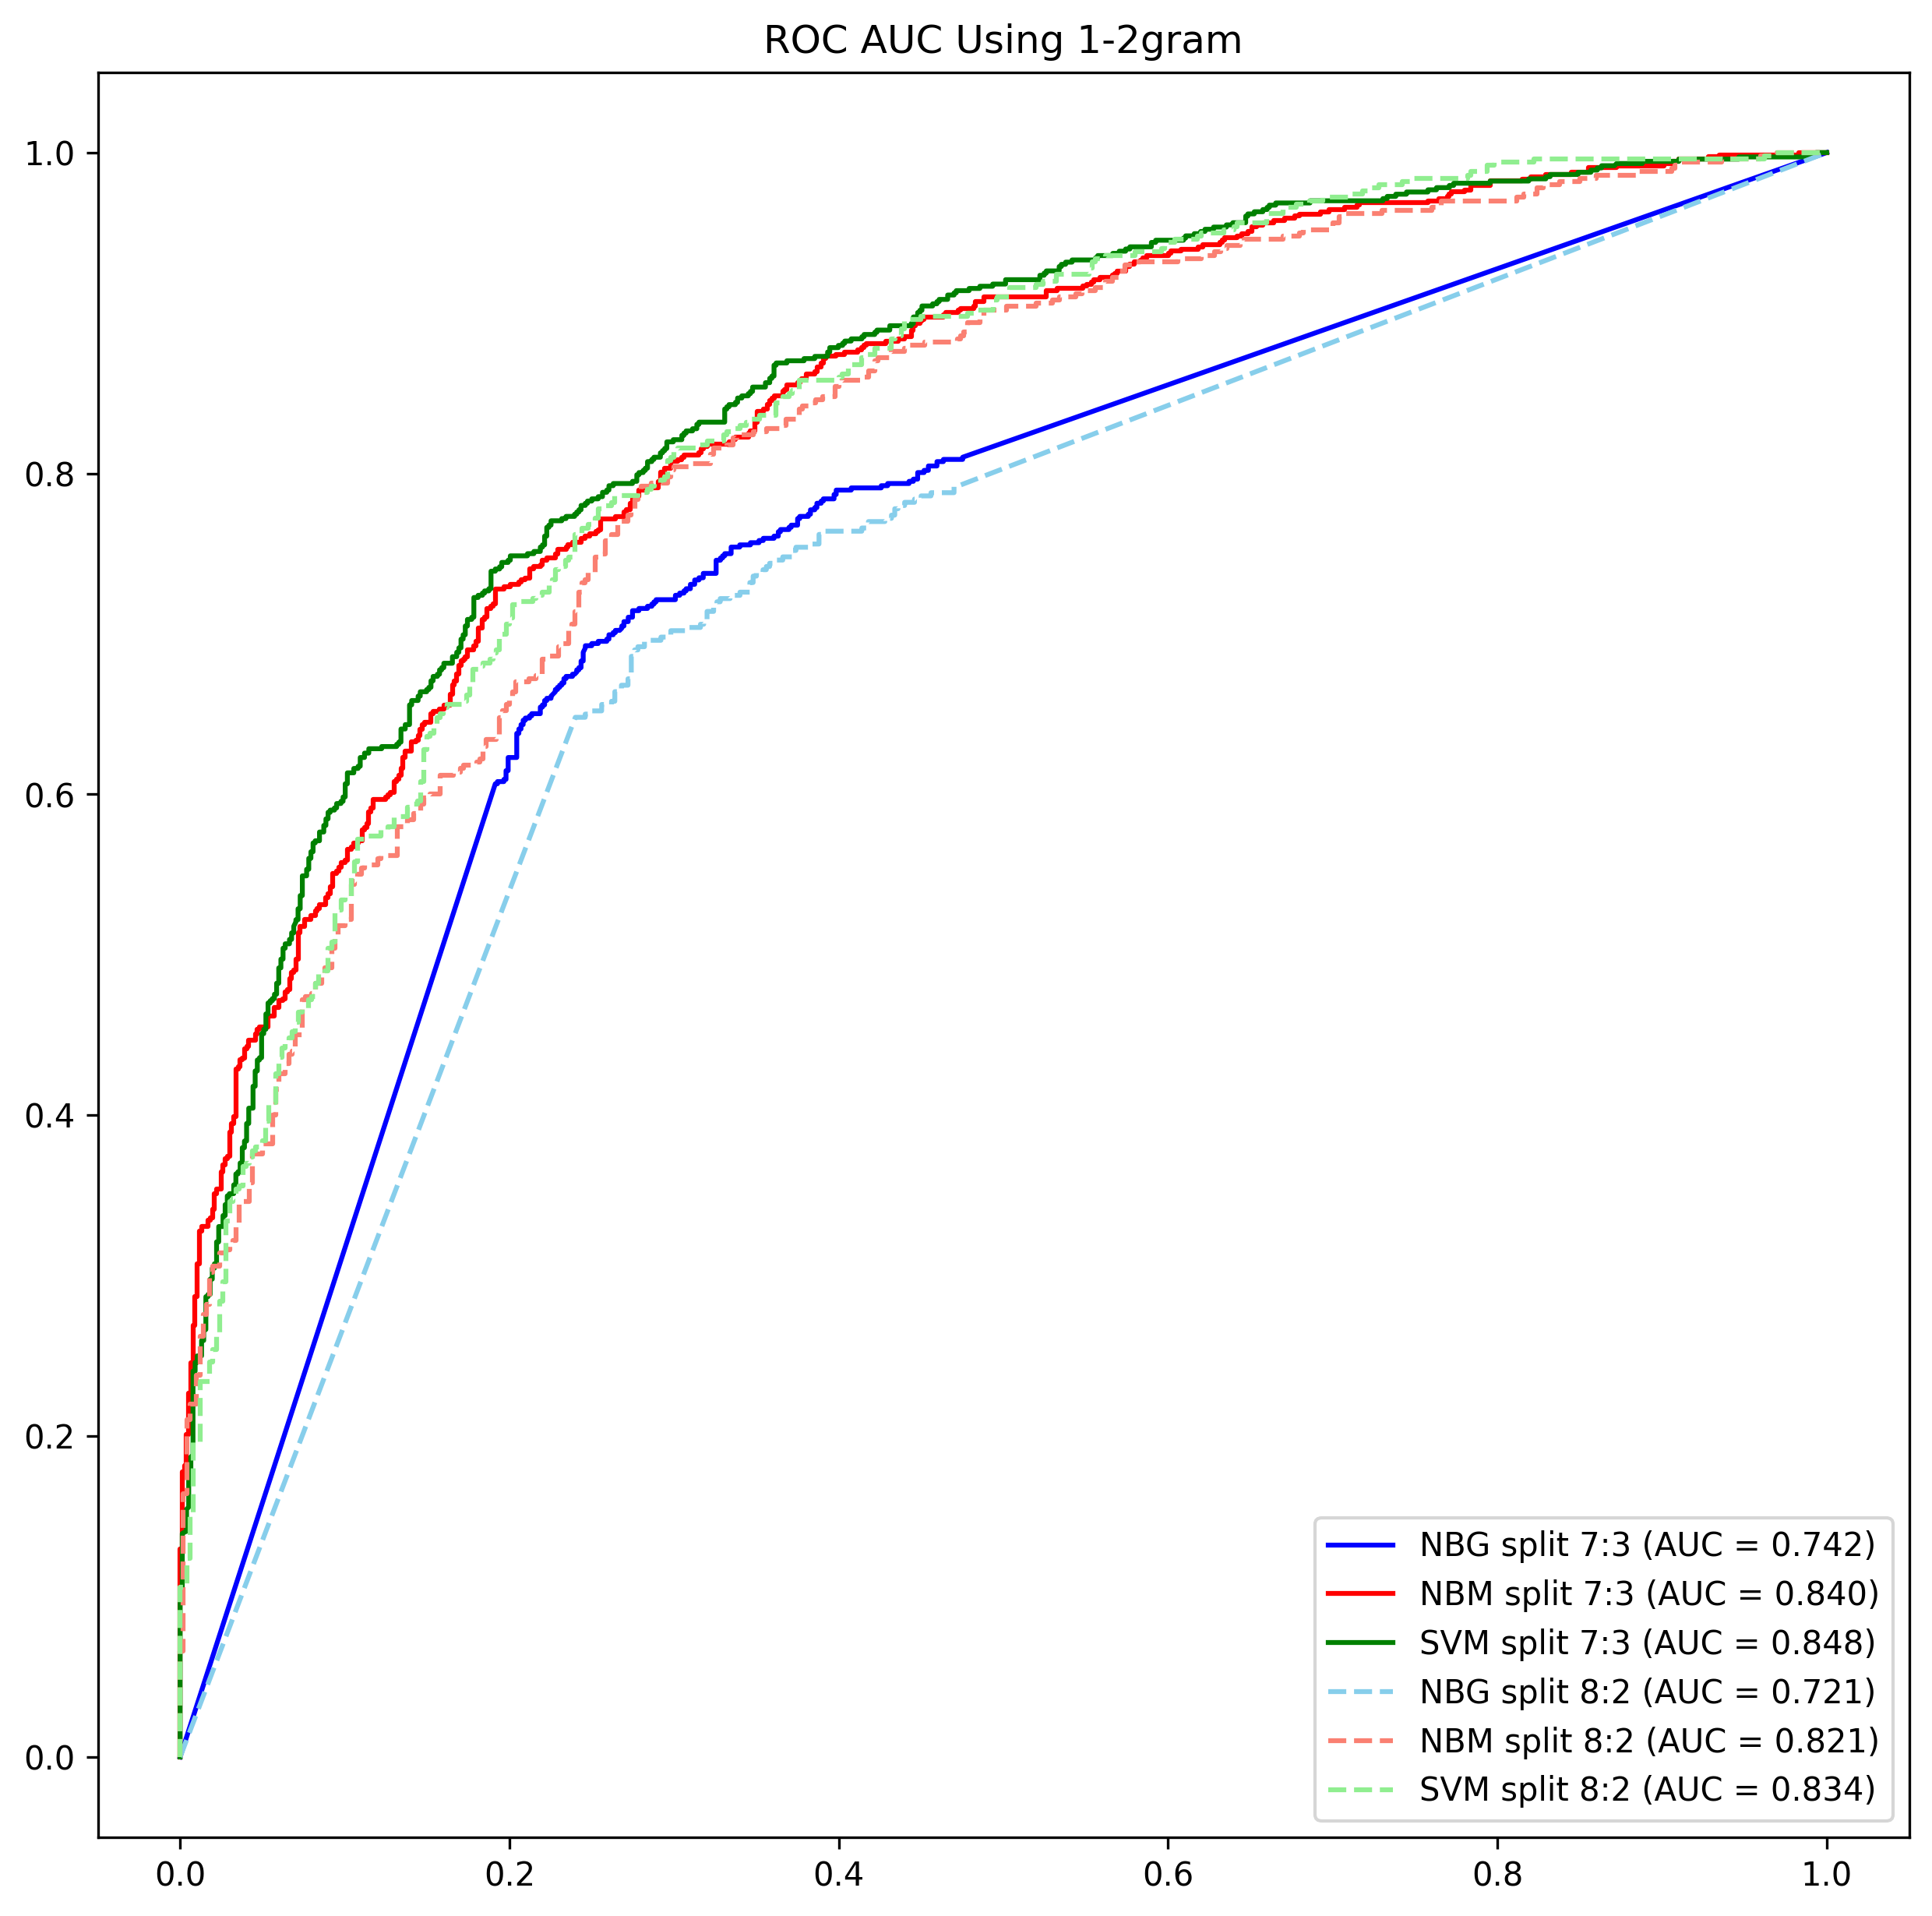

In [ ]:
def unibi_roc_auc(df_NBG, df_NBM, df_SVM, test_y, df_NBG2, df_NBM2, df_SVM2, test_y2, split):
  fpr_NBG, tpr_NBG, trh_NBG = roc_curve(test_y, df_NBG[:,1])
  auc_NBG = auc(fpr_NBG,tpr_NBG)
  fpr_NBM, tpr_NBM, trh_NBM = roc_curve(test_y, df_NBM[:,1])
  auc_NBM = auc(fpr_NBM,tpr_NBM)
  fpr_SVM, tpr_SVM, trh_SVM = roc_curve(test_y, df_SVM)
  auc_SVM = auc(fpr_SVM,tpr_SVM)

  fpr_NBG2, tpr_NBG2, trh_NBG2 = roc_curve(test_y2, df_NBG2[:,1])
  auc_NBG2 = auc(fpr_NBG2,tpr_NBG2)
  fpr_NBM2, tpr_NBM2, trh_NBM2 = roc_curve(test_y2, df_NBM2[:,1])
  auc_NBM2 = auc(fpr_NBM2,tpr_NBM2)
  fpr_SVM2, tpr_SVM2, trh_SVM2 = roc_curve(test_y2, df_SVM2)
  auc_SVM2 = auc(fpr_SVM2,tpr_SVM2)

  plt.figure(figsize=(10,10), dpi=300)
  plt.title('ROC AUC %s' % split)
  plt.plot(fpr_NBG, tpr_NBG, color='blue', label='NBG split 7:3 (AUC = %0.3f)' % auc_NBG)
  plt.plot(fpr_NBM, tpr_NBM, color='red', label='NBM split 7:3 (AUC = %0.3f)' % auc_NBM)
  plt.plot(fpr_SVM, tpr_SVM, color='green', label='SVM split 7:3 (AUC = %0.3f)' % auc_SVM)

  plt.plot(fpr_NBG2, tpr_NBG2, color='skyblue', ls='--', label='NBG split 8:2 (AUC = %0.3f)' % auc_NBG2)
  plt.plot(fpr_NBM2, tpr_NBM2, color='salmon', ls='--', label='NBM split 8:2 (AUC = %0.3f)' % auc_NBM2)
  plt.plot(fpr_SVM2, tpr_SVM2, color='lightgreen', ls='--', label='SVM split 8:2 (AUC = %0.3f)' % auc_SVM2)

  plt.legend(loc='lower right')
  plt.show()

#unibi_roc_auc(e2, j2, o2, test_y1, e5, j5, o5, test_y2, 'Using 1-2gram')